# Census Income Data Set

Extraction was done by Barry Becker from the 1994 Census database.

Prediction task is to determine whether a person makes over 50K a year.

Attribute Information:

50K, <=50K.

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('adult.csv',na_values='?')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

In [7]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
Income                2
dtype: int64

In [8]:
#Check the value_counts of each column
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' +str(df[column].unique()))
        print(df[column].value_counts())
        
        print('--------------------------------------------')
        

workclass:[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
--------------------------------------------
education:[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Pr

In [9]:
#As we see there are observations with '?'
#Imputing these observations with Nan
df['native-country'] = df['native-country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)

df.dropna(how='any',inplace=True)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [10]:
#education and education-num
for i in sorted(df['education-num'].unique()):
    print(i, " -  ",df[df['education-num']==i].education.unique())

1  -   [' Preschool']
2  -   [' 1st-4th']
3  -   [' 5th-6th']
4  -   [' 7th-8th']
5  -   [' 9th']
6  -   [' 10th']
7  -   [' 11th']
8  -   [' 12th']
9  -   [' HS-grad']
10  -   [' Some-college']
11  -   [' Assoc-voc']
12  -   [' Assoc-acdm']
13  -   [' Bachelors']
14  -   [' Masters']
15  -   [' Prof-school']
16  -   [' Doctorate']


education-num and eduction are the level of education,considering one of the two columns would be enough,Hence dropping education-num

In [11]:
df.drop('education-num',1,inplace=True)

In [12]:
df['Income'].value_counts(normalize=True)*100

 <=50K    75.107751
 >50K     24.892249
Name: Income, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital-gain    30162 non-null  int64 
 10  capital-loss    30162 non-null  int64 
 11  hours-per-week  30162 non-null  int64 
 12  native-country  30162 non-null  object
 13  Income          30162 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [14]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [15]:
#Checking for null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

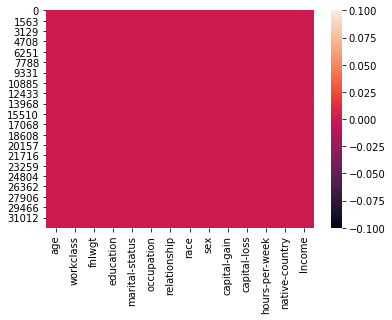

In [16]:
sns.heatmap(df.isnull())

In [17]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076511,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,0.000422,-0.009750,-0.022886
capital-gain,0.080154,0.000422,1.000000,-0.032229,0.080432
capital-loss,0.060165,-0.009750,-0.032229,1.000000,0.052417
hours-per-week,0.101599,-0.022886,0.080432,0.052417,1.000000


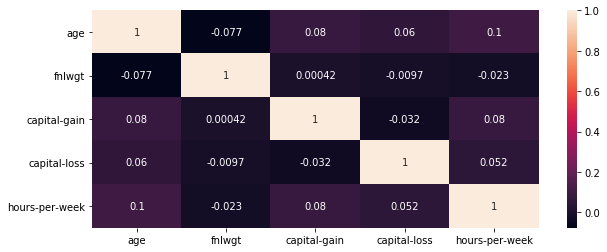

In [18]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)

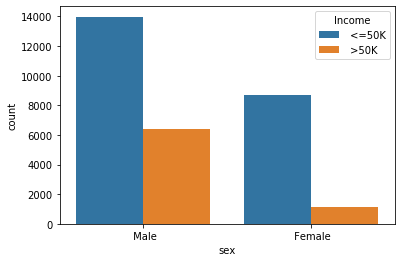

In [19]:
sns.countplot(x='sex',hue='Income',data=df)

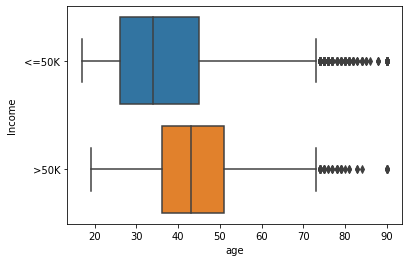

In [20]:
sns.boxplot(x='age',y='Income',data=df)

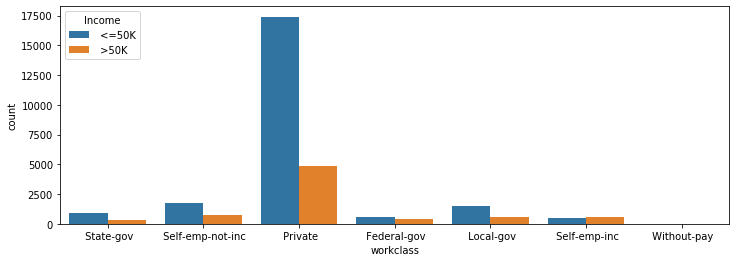

In [21]:
plt.figure(figsize=(12,4))
sns.countplot(x='workclass',hue='Income',data=df)

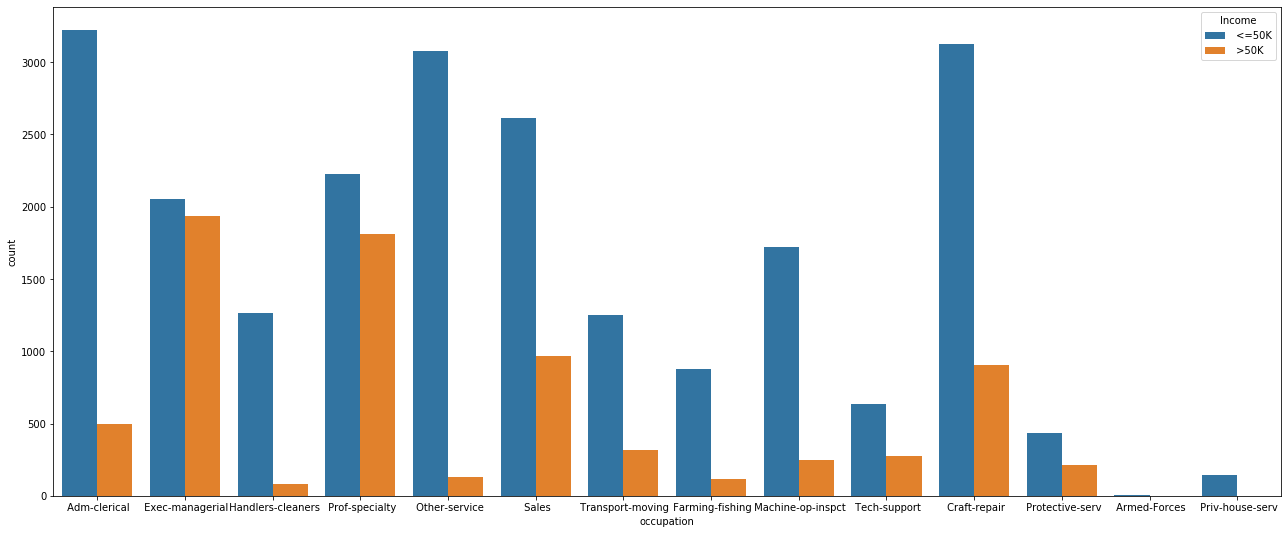

In [22]:
plt.figure(figsize=(22,9))
sns.countplot(x='occupation',hue='Income',data=df)

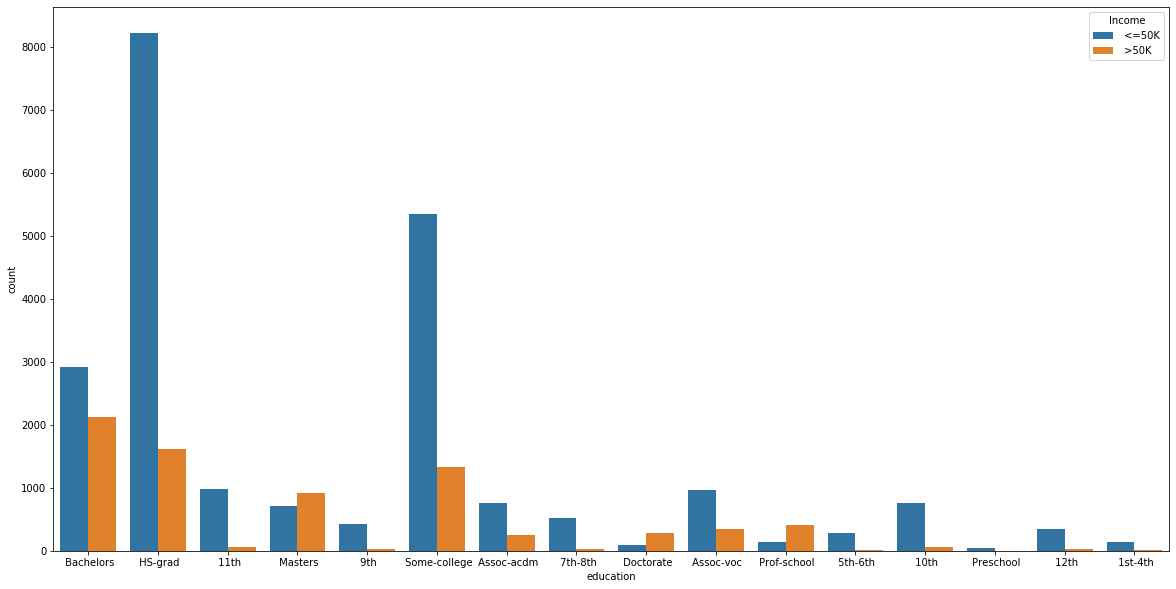

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(x='education',hue='Income',data=df)

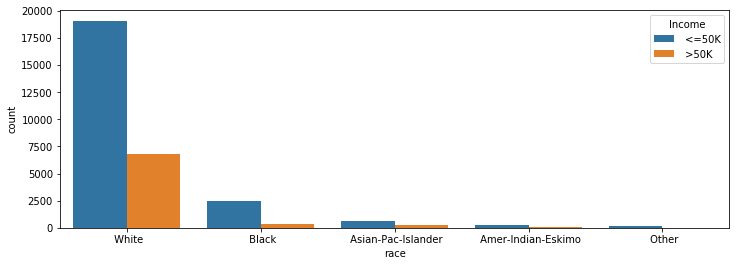

In [24]:
plt.figure(figsize=(12,4))
sns.countplot(x='race',hue='Income',data=df)

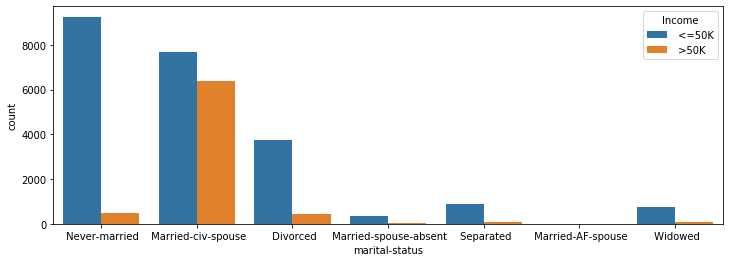

In [25]:
plt.figure(figsize=(12,4))
sns.countplot(x='marital-status',hue='Income',data=df)

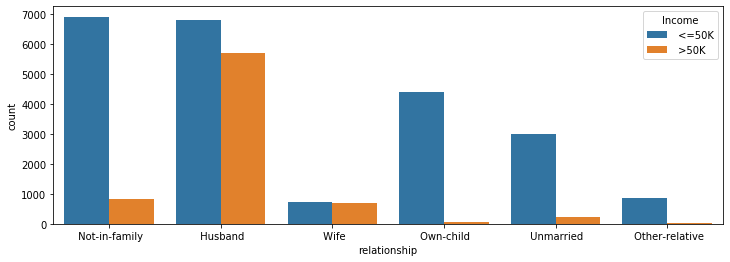

In [26]:
plt.figure(figsize=(12,4))
sns.countplot(x='relationship',hue='Income',data=df)

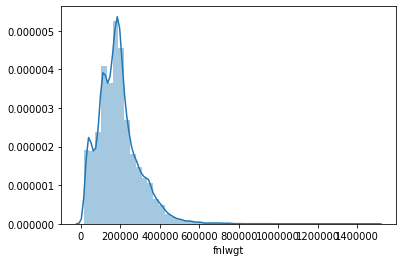

In [27]:
sns.distplot(df['fnlwgt'])

In [28]:
df['fnlwgt']=np.log(df['fnlwgt'])

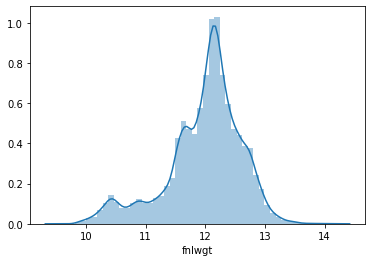

In [29]:
sns.distplot(df['fnlwgt'])

(array([2.943e+04, 5.000e+02, 7.900e+01, 3.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.480e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <a list of 10 Patch objects>)

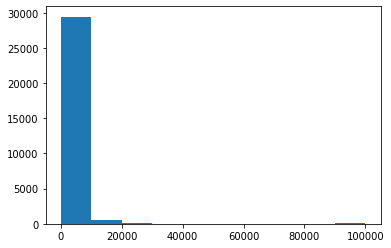

In [30]:
plt.hist(df['capital-gain'],bins=None)

(array([2.8744e+04, 1.7000e+01, 2.0000e+01, 4.2300e+02, 7.5100e+02,
        1.8900e+02, 1.1000e+01, 0.0000e+00, 6.0000e+00, 1.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <a list of 10 Patch objects>)

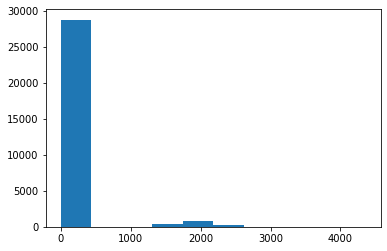

In [31]:
plt.hist(df['capital-loss'],bins=None)

In [32]:
df=df.fillna(0)
Income_map={' <=50K':1,' >50K':0}
df['Income']=df['Income'].map(Income_map).astype(int)

In [33]:
df[['workclass','Income']].groupby(['workclass']).mean()

,Income
workclass,
Federal-gov,0.612937
Local-gov,0.705370
Private,0.781208
Self-emp-inc,0.441341
Self-emp-not-inc,0.714286
State-gov,0.731040
Without-pay,1.000000


In [34]:
df[['native-country','Income']].groupby(['native-country']).mean()

,Income
native-country,
Cambodia,0.611111
Canada,0.663551
China,0.705882
Columbia,0.964286
Cuba,0.728261
Dominican-Republic,0.970149
Ecuador,0.851852
El-Salvador,0.910000
England,0.651163


Observations:
    
1. Mens are more likely to have income higher than 50K
2. Adults with an educational backgroud of Bachelors and HS Grad are likely to get an income higher than 50K
3. Adults with occupation: prof-speciality and Exec-managerial are likely to have income higher than 50K
4. workclass: Private have a higher chance of getting more than 50K.
5. Whites have more chances of geting more than 50K.
6. Husband has higher income.A married couple would likely to earn  >50K
7. native-country :Dominican-Republic, Columbia are more likely to earn more than 50K

In [35]:
#Transform the data
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype ==np.object:
        df[column]=LabelEncoder().fit_transform(df[column])

In [36]:
#Split the data
x=df.drop(['Income'],axis=1)
y=df['Income']

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
x= sc.fit_transform(x)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc


In [39]:
max_acc_score=0
for i in range(42,101):
    r_state=i
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("The accuracy score for",i, " is" ,acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
        
print("The maximum accuracy score ",final_r_state," is ",max_acc_score)     

The accuracy score for 42  is 0.7989391679098292
The accuracy score for 43  is 0.7942980275153323
The accuracy score for 44  is 0.7991049229239184
The accuracy score for 45  is 0.7916459472899056
The accuracy score for 46  is 0.801425493121167
The accuracy score for 47  is 0.792143212332173
The accuracy score for 48  is 0.7951268025857782
The accuracy score for 49  is 0.7916459472899056
The accuracy score for 50  is 0.7952925575998674
The accuracy score for 51  is 0.793966517487154
The accuracy score for 52  is 0.8019227581634344
The accuracy score for 53  is 0.7966185977125808
The accuracy score for 54  is 0.7851815017404277
The accuracy score for 55  is 0.803414553290237
The accuracy score for 56  is 0.7936350074589756
The accuracy score for 57  is 0.7886623570363004
The accuracy score for 58  is 0.7969501077407591
The accuracy score for 59  is 0.7870048068954086
The accuracy score for 60  is 0.7903199071771921
The accuracy score for 61  is 0.7918117023039947
The accuracy score for 6

In [40]:
#Finalizing the tain_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=69,test_size=0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(24129, 13)
(24129,)
(6033, 13)
(6033,)


In [41]:
#best parameters for KNN

from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
grid_param ={'n_neighbors':range(1,30)}
gd=GridSearchCV(knn,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 15}

In [42]:
#best parameters for DecisionTree

dtc=DecisionTreeClassifier()
grid_param ={'criterion': ['gini', 'entropy']}
gd=GridSearchCV(dtc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [46]:
#best parameters for SVC

svc = SVC()
grid_param ={'kernel': ('linear','poly','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'C': 10, 'kernel': 'rbf'}

In [45]:
#best parameters for RandomForest

rfc=RandomForestClassifier()
grid_param={"n_estimators":[10,100,500,1000]}
gd=GridSearchCV(rfc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'n_estimators': 1000}



[1 1 1 ... 0 1 1]
Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: 0.8050721034311288


The CV Score is 0.7953719012715651


[[ 471  982]
 [ 194 4386]]


              precision    recall  f1-score   support

           0       0.71      0.32      0.44      1453
           1       0.82      0.96      0.88      4580

    accuracy                           0.81      6033
   macro avg       0.76      0.64      0.66      6033
weighted avg       0.79      0.81      0.78      6033



roc_auc_score 0.6408994190606996


AxesSubplot(0.125,0.808774;0.62x0.0712264)


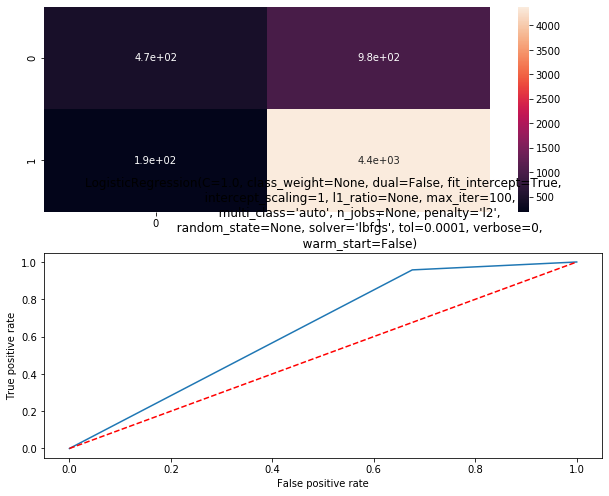



[1 1 0 ... 0 1 1]
Accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform') is: 0.8274490303331675


The CV Score is 0.8215306475305362


[[ 818  635]
 [ 406 4174]]


              precision    recall  f1-score   support

           0       0.67      0.56      0.61      1453
           1       0.87      0.91      0.89      4580

    accuracy                           0.83      6033
   macro avg       0.77      0.74      0.75      6033
weighted avg       0.82      0.83      0.82      6033



roc_auc_score 0.7371634353859053


AxesSubplot(0.125,0.808774;0.62x0.0712264)


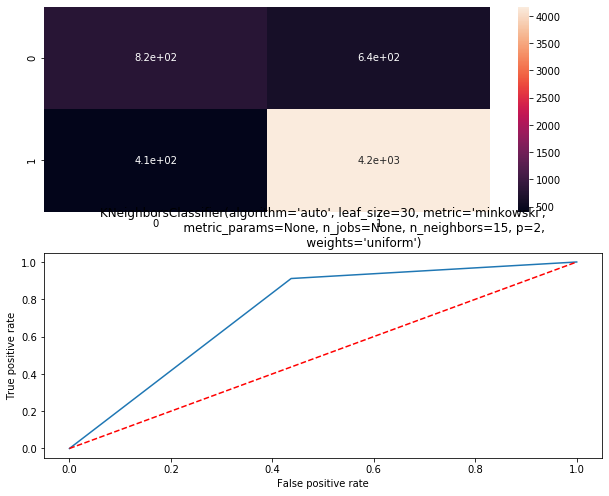



[1 0 0 ... 0 0 1]
Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 0.8065638985579314


The CV Score is 0.8073737733799206


[[ 905  548]
 [ 619 3961]]


              precision    recall  f1-score   support

           0       0.59      0.62      0.61      1453
           1       0.88      0.86      0.87      4580

    accuracy                           0.81      6033
   macro avg       0.74      0.74      0.74      6033
weighted avg       0.81      0.81      0.81      6033



roc_auc_score 0.7438482194646223


AxesSubplot(0.125,0.808774;0.62x0.0712264)


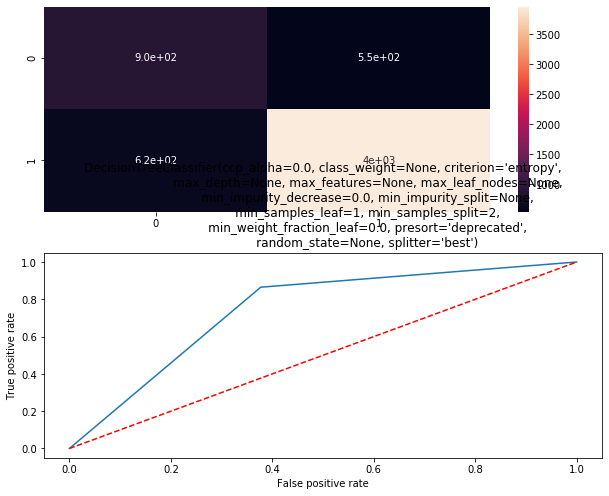



[1 1 1 ... 0 0 1]
Accuracy score of SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is: 0.8247969501077408


The CV Score is 0.8222932415041762


[[ 644  809]
 [ 248 4332]]


              precision    recall  f1-score   support

           0       0.72      0.44      0.55      1453
           1       0.84      0.95      0.89      4580

    accuracy                           0.82      6033
   macro avg       0.78      0.69      0.72      6033
weighted avg       0.81      0.82      0.81      6033



roc_auc_score 0.6945362253070744


AxesSubplot(0.125,0.808774;0.62x0.0712264)


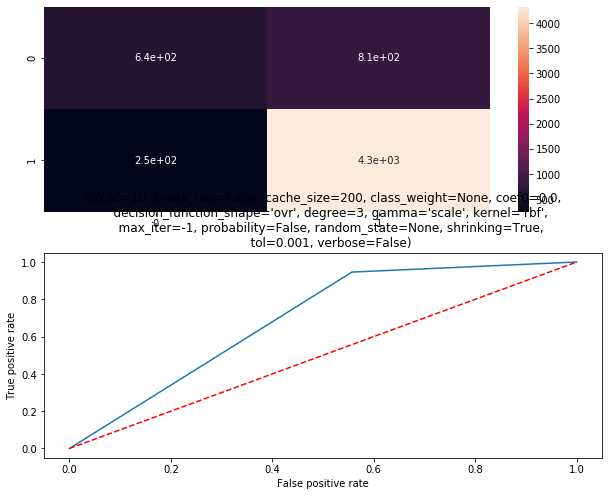



[1 1 1 ... 0 0 1]
Accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is: 0.8584452179678436


The CV Score is 0.8549832409370038


[[ 925  528]
 [ 326 4254]]


              precision    recall  f1-score   support

           0       0.74      0.64      0.68      1453
           1       0.89      0.93      0.91      4580

    accuracy                           0.86      6033
   macro avg       0.81      0.78      0.80      6033
weighted avg       0.85      0.86      0.85      60

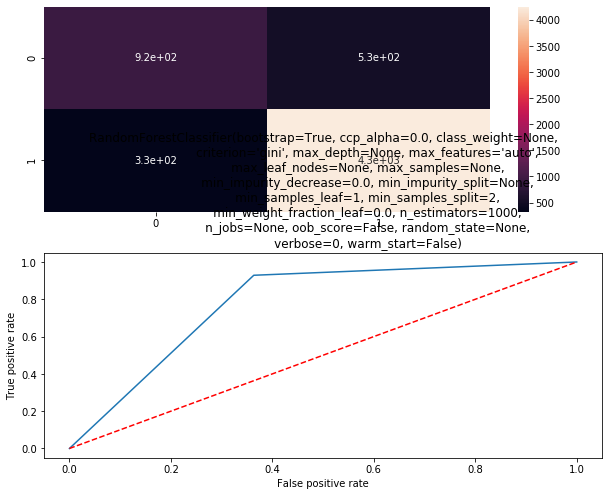



[1 1 1 ... 0 0 1]
Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is: 0.7947952925575998


The CV Score is 0.7913269678131902


[[ 444 1009]
 [ 229 4351]]


              precision    recall  f1-score   support

           0       0.66      0.31      0.42      1453
           1       0.81      0.95      0.88      4580

    accuracy                           0.79      6033
   macro avg       0.74      0.63      0.65      6033
weighted avg       0.78      0.79      0.77      6033



roc_auc_score 0.6277873365450791


AxesSubplot(0.125,0.808774;0.62x0.0712264)


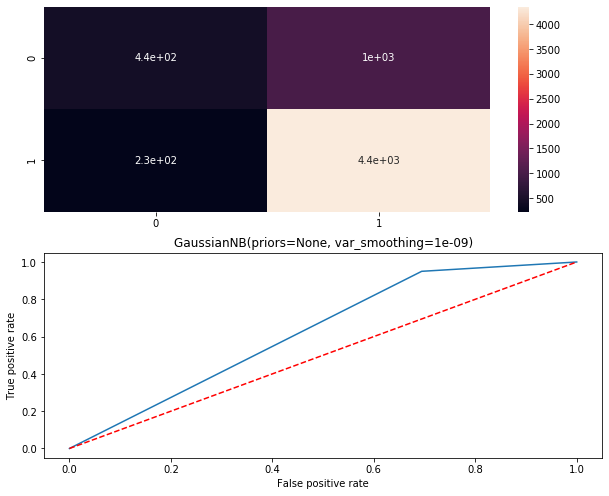

In [47]:
#Testing the models with the best parameters calculated

model=[]
score=[]
cvs=[]
rocscore=[]

for i in [LogisticRegression(),KNeighborsClassifier(n_neighbors=15),DecisionTreeClassifier(criterion='entropy'),SVC(kernel='rbf',C=10),RandomForestClassifier(n_estimators=1000),GaussianNB()]:
    model.append(i)
    print('\n')
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    pred=i.predict(x_test)
    print(pred)
    ac=accuracy_score(y_test,pred)
    print('Accuracy score of',i,'is:',ac)
    score.append(ac)
    print('\n')
    cv_score=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    print('The CV Score is', cv_score)
    cvs.append(cv_score)
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()

In [48]:
result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','SVC','RandomForestClassifier','GaussianNB'],'Accuracy_Score':score,'Cross_val_score':cvs})
result

,Model,Accuracy_Score,Cross_val_score
0,LogisticRegression,0.805072,0.795372
1,KNeighborsClassifier,0.827449,0.821531
2,DecisionTreeClassifier,0.806564,0.807374
3,SVC,0.824797,0.822293
4,RandomForestClassifier,0.858445,0.854983
5,GaussianNB,0.794795,0.791327


Since RandomForest is giving better results,we finalize the same.


Saving the model

In [49]:
from sklearn.externals import joblib
joblib.dump(rfc,'Income.pkl')

['Income.pkl']